<a href="https://colab.research.google.com/github/bhaskarbhawesh/BP/blob/main/Stock_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance scikit-learn numpy

In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime

def get_stock_data(ticker):
    data = yf.download(ticker, period="1y")
    return data

def prepare_data(data):
    data = data[['Close']].copy()
    data['Day'] = np.arange(len(data))
    return data.dropna()

def train_model(data):
    X = data[['Day']].values
    y = data['Close'].values
    model = LinearRegression()
    model.fit(X, y)
    return model

def predict_next_day_price(model, last_day):
    next_day = np.array([[last_day + 1]])
    predicted_price = model.predict(next_day)
    return float(predicted_price[0])

def main():
    while True:
        stock_name = input("Enter Indian stock symbol (e.g., RELIANCE, TCS, INFY): ").upper()
        ticker = stock_name + ".NS"
        print(f"Fetching data for {ticker}...")

        data = get_stock_data(ticker)

        if data.empty:
            print("Failed to fetch data. Check ticker symbol or internet connection.")
        else:
            current_price = float(data['Close'].iloc[-1])
            current_date = data.index[-1].strftime('%d-%m-%Y')
            print(f"Current closing price for {ticker} on {current_date} is: ₹{current_price:.2f}")

            data_prepared = prepare_data(data)
            model = train_model(data_prepared)

            last_day = data_prepared['Day'].iloc[-1]
            predicted_price = predict_next_day_price(model, last_day)

            next_date = (data.index[-1] + datetime.timedelta(days=1)).strftime('%d-%m-%Y')
            print(f"Predicted closing price for {ticker} on {next_date} is: ₹{predicted_price:.2f}")

        repeat = input("\nDo you want to predict another stock? (yes/no): ").strip().lower()
        if repeat != 'yes':
            print("Exiting program. Goodbye!")
            break

if __name__ == "__main__":
    main()


Fetching data for TCS.NS...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
<ipython-input-2-db98da6d0b61>:38: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])
<ipython-input-2-db98da6d0b61>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(predicted_price[0])


Current closing price for TCS.NS on 06-06-2025 is: ₹3384.20
Predicted closing price for TCS.NS on 07-06-2025 is: ₹3539.79


In [ ]:
# import yfinance as yf
# import numpy as np
# from sklearn.linear_model import LinearRegression
# import datetime

# def get_stock_data(ticker):
#     data = yf.download(ticker, period="1y")
#     return data

# def prepare_data(data):
#     data = data[['Close']].copy()
#     data['Day'] = np.arange(len(data))
#     return data.dropna()

# def train_model(data):
#     X = data[['Day']].values
#     y = data['Close'].values
#     model = LinearRegression()
#     model.fit(X, y)
#     return model

# def predict_next_day_price(model, last_day):
#     next_day = np.array([[last_day + 1]])
#     predicted_price = model.predict(next_day)
#     return float(predicted_price[0])  # Explicit float conversion

# def main():
#     stock_name = input("Enter Indian stock symbol (e.g., RELIANCE, TCS, INFY): ").upper()
#     ticker = stock_name + ".NS"
#     print(f"Fetching data for {ticker}...")

#     data = get_stock_data(ticker)

#     if data.empty:
#         print("Failed to fetch data. Check ticker symbol.")
#         return

#     data_prepared = prepare_data(data)
#     model = train_model(data_prepared)

#     last_day = data_prepared['Day'].iloc[-1]
#     predicted_price = predict_next_day_price(model, last_day)

#     next_date = data.index[-1] + datetime.timedelta(days=1)
#     print(f"Predicted closing price for {ticker} on {next_date.date()} is: ₹{predicted_price:.2f}")

# if __name__ == "__main__":
#     main()


Enter Indian stock symbol (e.g., RELIANCE, TCS, INFY): tcs


[*********************100%***********************]  1 of 1 completed

Fetching data for TCS.NS...
Predicted closing price for TCS.NS on 2025-05-30 is: ₹3635.78



<ipython-input-37-fa394943a7df>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(predicted_price[0])  # Explicit float conversion


Enter Indian stock symbol (e.g., RELIANCE, TCS, INFY): TCS


[*********************100%***********************]  1 of 1 completed

Fetching data for TCS.NS...
Current closing price for TCS.NS on 29-05-25 is: ₹3498.10
Predicted closing price for TCS.NS on 30-05-25 is: ₹3447.06



<ipython-input-3-b9b765e0f698>:59: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(data['Close'].iloc[-1])
<ipython-input-3-b9b765e0f698>:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(predicted_price[0])


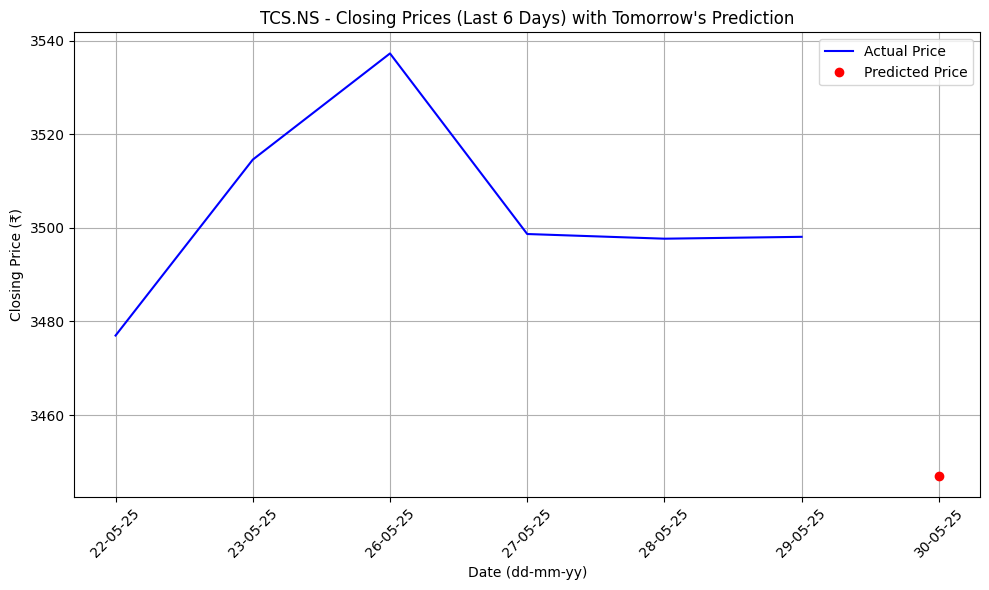

In [ ]:
# import yfinance as yf
# import numpy as np
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt
# import datetime

# def fetch_data(ticker):
#     ticker_full = ticker.upper() + ".NS"
#     print(f"Fetching data for {ticker_full}...")
#     data = yf.download(ticker_full, period="60d")
#     if data.empty:
#         raise ValueError("No data found for this ticker.")
#     return data, ticker_full

# def prepare_data(data):
#     data = data.copy()
#     data['Day'] = np.arange(len(data))
#     X = data[['Day']]
#     y = data['Close']
#     return X, y

# def train_model(X, y):
#     model = LinearRegression()
#     model.fit(X, y)
#     return model

# def predict_next_day(model, data):
#     next_day_num = len(data)
#     predicted_price = model.predict(np.array([[next_day_num]]))
#     return float(predicted_price[0])

# def plot_graph(data, y, predicted_price, ticker_full):
#     plt.figure(figsize=(10, 6))

#     # last 6 days for plotting
#     data_last6 = data[-6:]
#     y_last6 = y[-6:]
#     dates_last6 = data_last6.index.strftime('%d-%m-%y')

#     plt.plot(dates_last6, y_last6, label="Actual Price", color='blue')

#     next_date = (data.index[-1] + datetime.timedelta(days=1)).strftime('%d-%m-%y')
#     plt.plot(next_date, predicted_price, 'ro', label="Predicted Price")

#     plt.title(f"{ticker_full} - Closing Prices (Last 6 Days) with Tomorrow's Prediction")
#     plt.xlabel("Date (dd-mm-yy)")
#     plt.ylabel("Closing Price (₹)")
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# def main():
#     ticker = input("Enter Indian stock symbol (e.g., RELIANCE, TCS, INFY): ").strip()
#     data, ticker_full = fetch_data(ticker)

#     current_price = float(data['Close'].iloc[-1])
#     current_date = data.index[-1].strftime('%d-%m-%y')
#     print(f"Current closing price for {ticker_full} on {current_date} is: ₹{current_price:.2f}")

#     X, y = prepare_data(data)
#     model = train_model(X, y)
#     predicted_price = predict_next_day(model, data)

#     next_date = (data.index[-1] + datetime.timedelta(days=1)).strftime('%d-%m-%y')
#     print(f"Predicted closing price for {ticker_full} on {next_date} is: ₹{predicted_price:.2f}")

#     plot_graph(data, y, predicted_price, ticker_full)

# if __name__ == "__main__":
#     main()